In [4]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN

In [5]:
credit = pd.read_csv("Jeux_de_donnees/CC GENERAL.csv", delimiter=",", encoding="latin-1")
credit.head()
print(credit.shape)

(8950, 18)


In [6]:
credit.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.subplot(111)
sns.boxplot(credit["MINIMUM_PAYMENTS"])
sns.displot(credit["MINIMUM_PAYMENTS"]);

DATA CLEANING
- verifier les valeurs manquants (missing, null)
- drop des valeurs manquant (dropna) ou impute par valeur médian 
    credit.fillna(credit.median())

In [7]:
#
credit = credit.dropna().reset_index(drop=True)

In [8]:
credit.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000
mean,1601.224893,0.895035,1025.433874,604.901438,420.843533,994.175523,0.496000,0.205909,0.368820,0.137604,3.313918,15.033233,4522.091030,1784.478099,864.304943,0.159304,11.534391
std,2095.571300,0.207697,2167.107984,1684.307803,917.245182,2121.458303,0.401273,0.300054,0.398093,0.201791,6.912506,25.180468,3659.240379,2909.810090,2372.566350,0.296271,1.310984
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.049513,0.019163,0.000000,6.000000
25%,148.095189,0.909091,43.367500,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,418.559237,169.163545,0.000000,12.000000
50%,916.855459,1.000000,375.405000,44.995000,94.785000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,896.675701,312.452292,0.000000,12.000000
75%,2105.195853,1.000000,1145.980000,599.100000,484.147500,1132.385490,0.916667,0.333333,0.750000,0.250000,4.000000,18.000000,6500.000000,1951.142090,825.496463,0.166667,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [9]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8636 entries, 0 to 8635
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8636 non-null   object 
 1   BALANCE                           8636 non-null   float64
 2   BALANCE_FREQUENCY                 8636 non-null   float64
 3   PURCHASES                         8636 non-null   float64
 4   ONEOFF_PURCHASES                  8636 non-null   float64
 5   INSTALLMENTS_PURCHASES            8636 non-null   float64
 6   CASH_ADVANCE                      8636 non-null   float64
 7   PURCHASES_FREQUENCY               8636 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8636 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8636 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8636 non-null   float64
 11  CASH_ADVANCE_TRX                  8636 non-null   int64  
 12  PURCHA

In [10]:
credit.columns[1:]

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [11]:
#credit = credit.drop(columns=["CUST_ID"])
#count valeur NaN
credit.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

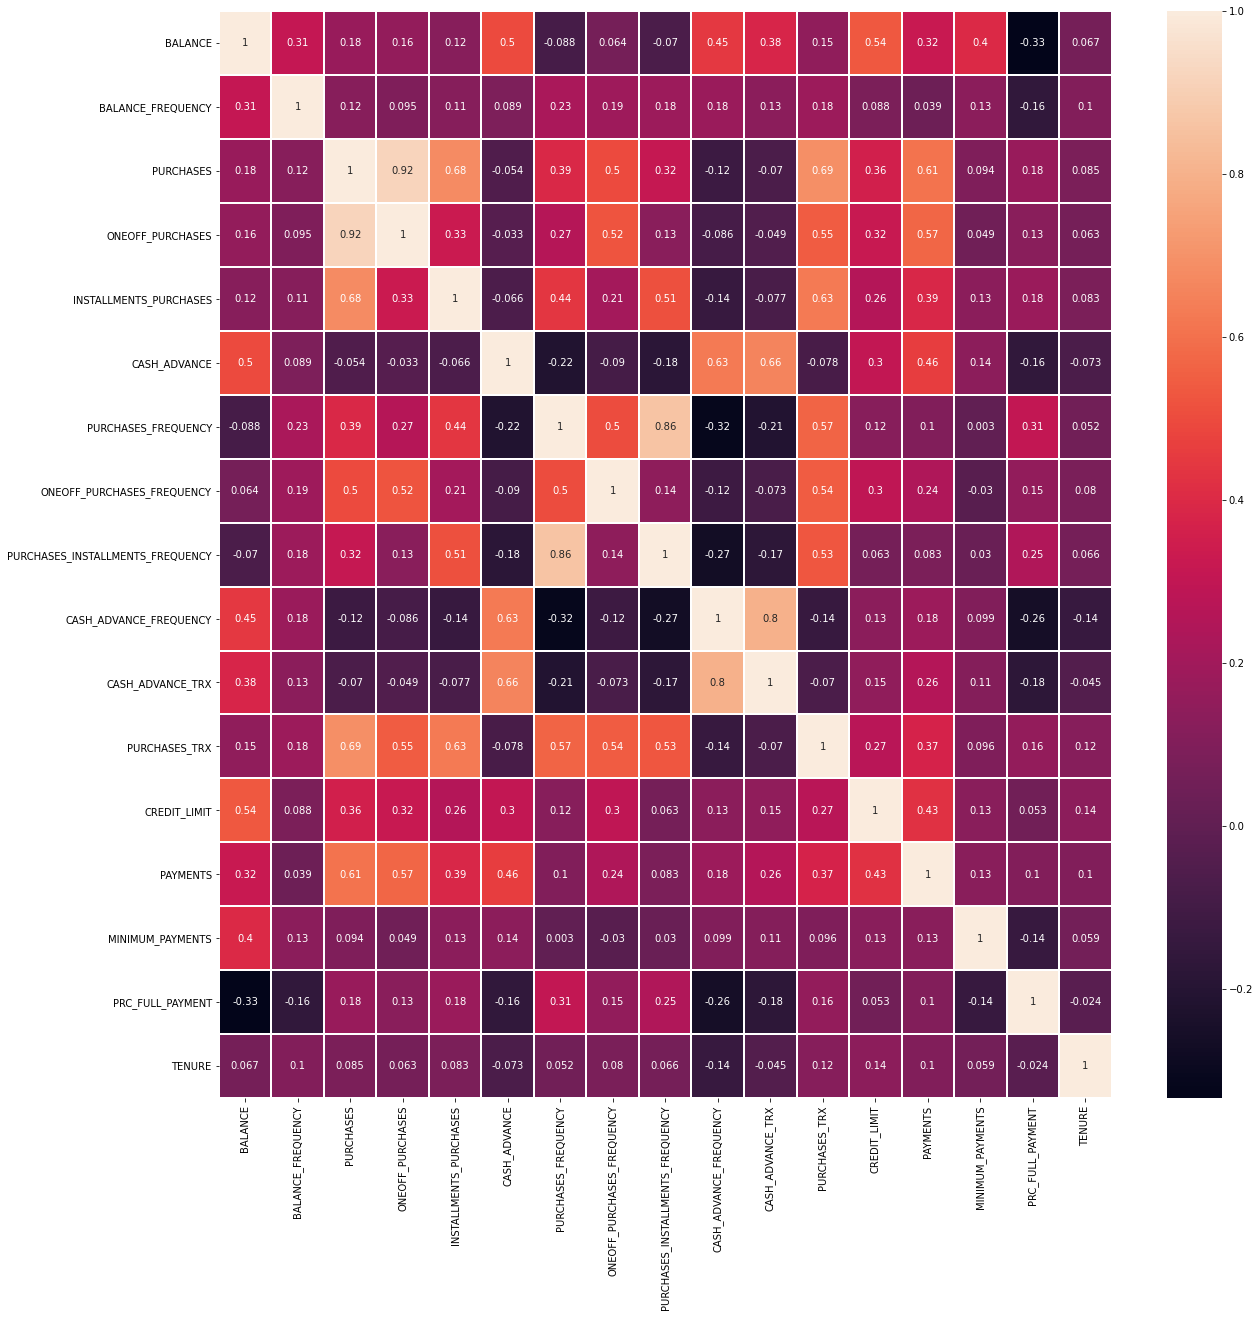

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
correlation = credit[credit.columns[1:]].corr()


plt.figure(figsize=[20,20])
plt.subplot(111)
sns.heatmap(correlation, annot=True, linewidths=1.0);



CLUSTERING PAR KMEAN

In [13]:
#credit.drop(columns=["index"])

credit = credit[credit.columns[1:]]


PREPROCESSING LES DONNEES POUR ML
- Normalize (standardize ) the input values using StandardScaler().

In [14]:
from sklearn.preprocessing import StandardScaler, normalize

scaler = StandardScaler()

# transform data: normalised
credit_scaled = scaler.fit_transform(credit)
# normalized 
credit_norm = normalize(credit_scaled)

In [15]:
credit_norm

array([[-0.31180598, -0.15495427, -0.17971746, ..., -0.12792899,
        -0.22516905,  0.14872919],
       [ 0.21565204,  0.01909973, -0.1335445 , ...,  0.02474671,
         0.05993595,  0.10023585],
       [ 0.12169414,  0.14417356, -0.03320825, ..., -0.02849958,
        -0.15339393,  0.10132012],
       ...,
       [-0.15650904, -0.06175225, -0.0845074 , ..., -0.06850276,
         0.06363318, -0.87751641],
       [-0.15372249, -0.06027303, -0.09600196, ..., -0.06914187,
         0.06210891, -0.85649639],
       [-0.11523519, -0.21612847,  0.00615119, ..., -0.06429227,
        -0.10569224, -0.8298107 ]])

In [16]:
#tester KMeans avec nombre de clusters varié entre 2-18
#jeux de données étant scalées & normalizé

from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import silhouette_score

def test_kmean(data_mod, nb_clus):
    cluster = [i for i in range(2,nb_clus)]
    inertie = []
    silhouette = []
    X = data_mod

    for k in cluster:
        clustering = KMeans(n_clusters=k, random_state=42)
        y_pred = clustering.fit_predict(X)

        inertie.append(clustering.inertia_)
        silhouette.append(silhouette_score(data_mod, clustering.labels_))
    return inertie, silhouette



Tracer les courbes inertie 

In [17]:

def graphic_inertie_cluster(nb_clus, inertie):
    #creer data pour courbe 
    df_inertie = pd.DataFrame({"cluster": range(2, nb_clus), "inertie": inertie})

    plt.figure(figsize=(10,6))
    plt.subplot(111)
    plt.title("Inertie par clusters")
    plt.xlabel("Nb de clusters")
    plt.ylabel("inertie ")
    plt.xticks(range(2,19))
    sns.lineplot(data=df_inertie, x=range(2, 19), y=inertie, markers='o');



def graphic_silhouette_cluster(nb_clus, line_vertical, silhouette):
    df_silhouette = pd.DataFrame({"cluster": range(2, nb_clus), "silhouette": silhouette})

    plt.title("Silhouette par clusters")
    plt.xlabel("Nb de cluster")
    plt.ylabel("Score de silhouette")
    plt.axvline(line_vertical, ls="--", c='red')
    plt.xticks(range(2, nb_clus))
    sns.lineplot(data=df_silhouette, x=range(2, nb_clus), y=silhouette, markers='o');

In [18]:
#Kmean avec les données sont transformées par StandardScale
nb_cluster = 19
inertie_scale, silhouette_scale = test_kmean(credit_scaled, nb_cluster)


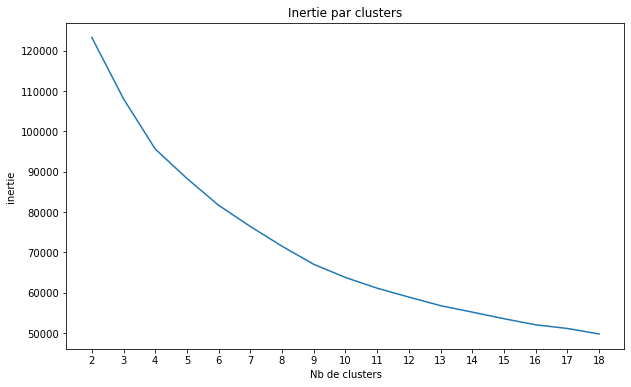

In [19]:
graphic_inertie_cluster(nb_cluster, inertie_scale)

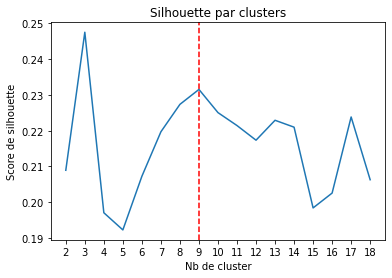

In [20]:
graphic_silhouette_cluster(nb_cluster, 9, silhouette_scale)


# #Kmean avec le jeux de données scale et normalize

In [21]:

inertie_norm, silhouette_norm = test_kmean(credit_norm, nb_cluster)

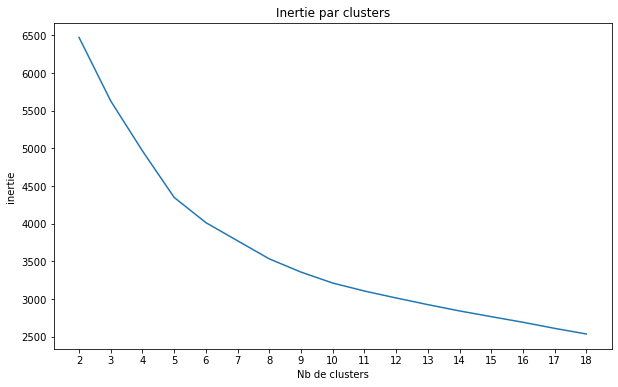

In [53]:
graphic_inertie_cluster(nb_cluster, inertie_norm)

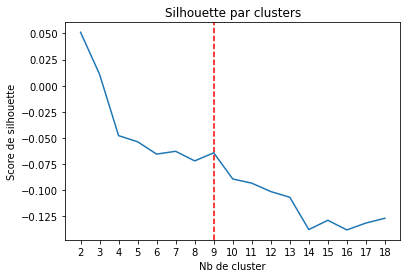

In [55]:
graphic_silhouette_cluster(nb_cluster, 9, silhouette_norm)

In [33]:
plt.figure(figsize=[10,6])
for i in range(2,10):
    plt.plot(111)
    sns.distplot(subset[""], hist = False, kde = True, kde_kws= {"shade": True}, label=)


cluster =  4  -> silouette =  0.2481649186951617
cluster =  5  -> silouette =  0.24286732033830777
cluster =  6  -> silouette =  0.24086109519656385
cluster =  7  -> silouette =  0.21783737780817305
cluster =  8  -> silouette =  0.21702819585509822
cluster =  9  -> silouette =  0.21577843525503035


In [17]:
dbscan = DBSCAN(eps=0.5, min_samples=10)
X=credit[credit.columns[2:]]

clustering = dbscan.fit(X)
y_pred = clustering

In [18]:
dbscan.labels_

array([-1, -1, -1, ..., -1, -1, -1])

In [19]:
dbscan.labels_.shape

(8636,)

In [20]:
credit['cluster'] = dbscan.labels_

In [21]:
credit["cluster"].value_counts()

-1    8636
Name: cluster, dtype: int64